# Hypercar Data Analysis
### Sunpreet S. Chahal

##### Within this notebook I will analyse a small dataset containing various hypercars.
The data is seperated into;  Car Name, 'Displacement , Engine, hp, Transmission, Top-speeed, Cost.

There are various missing/incorrect values within the dataset, these will need to be manipulated and cleaned to make the values correct.

To conclude the analysis, I will visualise various factors that can be look into within this dataset, such as;
- HP/Cost ( car woth the most hp/lowest cost, average HP/cost).
- HP/top speed (car with the lowest hp/fastest top speed, highest hp/fastest etc., average HP/top speed).
- Engine that delivers the highest HP/top speed seperated and combined.
- Conclude the car with the best value (in terms of performance), not appreciating value due to rarity/history.

#### Set-up

In [16]:
## Import libraries
import pandas as pd
import numpy as ny
import matplotlib.pyplot as mpy
import matplotlib as mtp
import seaborn as sns

In [17]:
## Import Dataframe 
#Duplicate backslashes (\) if cannot load df.
hyperdb = pd.read_csv("D:\PROJECTS\Hyper Cars ✔\Hyper Cars ORIGINAL.csv",encoding='ISO-8859-1',low_memory=False)

#Present Data
hyperdb

,Car Name,Displacement,Enginee,hp,Transmission,Toppp-speeed,Cost
0,McLaren F1,6.100000345,V12,618.0,6.0,243.000,"25, 000, 000"
1,Bugatti Chiron,8,W16,1479.0,7.0,250.000,"3, 000, 000"
2,Mercedes-AMG ONE,1.6,V6,748.0,8.0,217.000,"2, 653, 000"
3,McLaren Sennaaaa,4,V8987654,789.0,NaN,211.000,"1, 500, 000"
4,Koenigseeeggg Agera,5,V8,1016.0,NaN,249.000,"2, 500, 000"
5,Porsche 918 Spyder,Hello,V8,NaN,7.0,211.000,"900, 000"
6,Ferrari LaFerrari,6.3,V12,949.0,7.0,NaN,"2, 000, 000"
7,Pagaaani Huayra BC,6,__,745.0,7.0,230.000,"2, 550, 000"
8,Aston Martin Valkyrie,6.590987865,V12,NaN,NaN,250.000,"3, 200, 000"
9,Bugatti Veyronre,8,W16,987.0,7.0,267.856,"2, 000, 000"


In [18]:
##Print columns for future referece
hyperdb.columns

Index(['     Car Name', 'Displacement ', 'Enginee', '          hp',
       '   Transmission', '    Toppp-speeed', '           Cost'],
      dtype='object')

#### Data Manipulation

In [19]:
##Replace all incorrect values within the df - c = clean. 
#Values for each column below were gathered from Google searches

#Replace car names
hyperdb = hyperdb.replace("Koenigseeeggg Agera","Koenigsegg Agera")
hyperdb = hyperdb.replace("McLaren Sennaaaa","McLaren Senna")
hyperdb = hyperdb.replace("Pagaaani Huayra BC","Pagani Huayra BC")
hyperdb = hyperdb.replace("Bugatti Veyronre","Bugatti Veyron")

#Replace displacement values
hyperdb = hyperdb.replace("6.100000345","6.1") 
hyperdb = hyperdb.replace("Hello","4.6")
hyperdb = hyperdb.replace("6.590987865","6.5") 

#Replace engine values
hyperdb = hyperdb.replace("__","V12") 
hyperdb = hyperdb.replace("V8987654","V8") 

#Replace incorrect column names
hyperdb = hyperdb.rename(columns={"    Toppp-speeed": "Top-Speed", "Enginee": "Engine"})

#Print changes 
hyperdb

,Car Name,Displacement,Engine,hp,Transmission,Top-Speed,Cost
0,McLaren F1,6.1,V12,618.0,6.0,243.000,"25, 000, 000"
1,Bugatti Chiron,8,W16,1479.0,7.0,250.000,"3, 000, 000"
2,Mercedes-AMG ONE,1.6,V6,748.0,8.0,217.000,"2, 653, 000"
3,McLaren Senna,4,V8,789.0,NaN,211.000,"1, 500, 000"
4,Koenigsegg Agera,5,V8,1016.0,NaN,249.000,"2, 500, 000"
5,Porsche 918 Spyder,4.6,V8,NaN,7.0,211.000,"900, 000"
6,Ferrari LaFerrari,6.3,V12,949.0,7.0,NaN,"2, 000, 000"
7,Pagani Huayra BC,6,V12,745.0,7.0,230.000,"2, 550, 000"
8,Aston Martin Valkyrie,6.5,V12,NaN,NaN,250.000,"3, 200, 000"
9,Bugatti Veyron,8,W16,987.0,7.0,267.856,"2, 000, 000"


#### Data Cleaning

In [20]:
##Check for null values

hyperdb.isnull().any()
#There are 3 columsn with null values; HP, Transmission and Top Speed

     Car Name      False
Displacement       False
Engine             False
          hp        True
   Transmission     True
Top-Speed           True
           Cost    False
dtype: bool

In [21]:
hyperdb.columns

Index(['     Car Name', 'Displacement ', 'Engine', '          hp',
       '   Transmission', 'Top-Speed', '           Cost'],
      dtype='object')

In [22]:
##Fill in the null values
#Values for each column below were gathered from Google searches

hyperdb = hyperdb.fillna({'          hp': 1160.0,'   Transmission': 7.0, 'Top-Speed': 217})
hyperdb

,Car Name,Displacement,Engine,hp,Transmission,Top-Speed,Cost
0,McLaren F1,6.1,V12,618.0,6.0,243.000,"25, 000, 000"
1,Bugatti Chiron,8,W16,1479.0,7.0,250.000,"3, 000, 000"
2,Mercedes-AMG ONE,1.6,V6,748.0,8.0,217.000,"2, 653, 000"
3,McLaren Senna,4,V8,789.0,7.0,211.000,"1, 500, 000"
4,Koenigsegg Agera,5,V8,1016.0,7.0,249.000,"2, 500, 000"
5,Porsche 918 Spyder,4.6,V8,1160.0,7.0,211.000,"900, 000"
6,Ferrari LaFerrari,6.3,V12,949.0,7.0,217.000,"2, 000, 000"
7,Pagani Huayra BC,6,V12,745.0,7.0,230.000,"2, 550, 000"
8,Aston Martin Valkyrie,6.5,V12,1160.0,7.0,250.000,"3, 200, 000"
9,Bugatti Veyron,8,W16,987.0,7.0,267.856,"2, 000, 000"


#### Data Visualisation

In [23]:
##Present a summary of all numeric values within the dataset. 
hyperdb.describe()

,hp,Transmission,Top-Speed
count,10.000000,10.000000,10.000000
mean,965.100000,7.000000,234.585600
std,256.138179,0.471405,20.035523
min,618.000000,6.000000,211.000000
25%,758.250000,7.000000,217.000000
50%,968.000000,7.000000,236.500000
75%,1124.000000,7.000000,249.750000
max,1479.000000,8.000000,267.856000


##### Correlation of HP/Top Speed

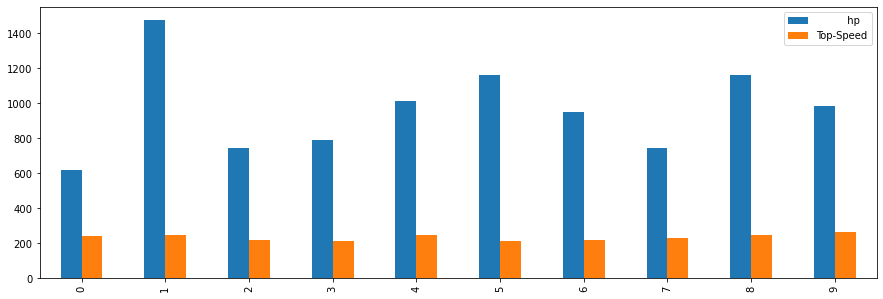

In [24]:
##Compare the correlation of HP and Top Speed
#Visualise whether HP correlates to a high speed or not. 
hyperdb[['          hp', 'Top-Speed']].plot.bar(figsize=(15,5))

We can see from the graph above that there is not clear correlation of; high HP resulting in a higher speed.
The Bugatti Chiron has the most HP - 1479.0, but has the same/simillar top speed of the Aston Martin Valkrie and the Koenigsegg Agera.

We can clearly see that the McLaren F1 has the most efficient HP:Top Speed ratio. We know this via the density of the bars. 
Though the price is an extreme outlier, ~10x the price of yhe other cars listed, so there are pros and cons to the McLaren F1. 

Though HP isn't solely responsible for the top-speed, from the graph we can see that the McLaren F1 uses it's HP the most efficiently, whereas the Bugatti Chiron is the least efficient, having alot of HP but has a simillar top speed as the Aston Martin/Koenigsegg. 

##### Hypercar Price Comparison 

In [25]:
##Costs variable
Costs = hyperdb['           Cost']
Costs
Carnames = hyperdb['     Car Name']
Carnames

0               McLaren F1
1           Bugatti Chiron
2         Mercedes-AMG ONE
3            McLaren Senna
4         Koenigsegg Agera
5       Porsche 918 Spyder
6        Ferrari LaFerrari
7         Pagani Huayra BC
8    Aston Martin Valkyrie
9           Bugatti Veyron
Name:      Car Name, dtype: object

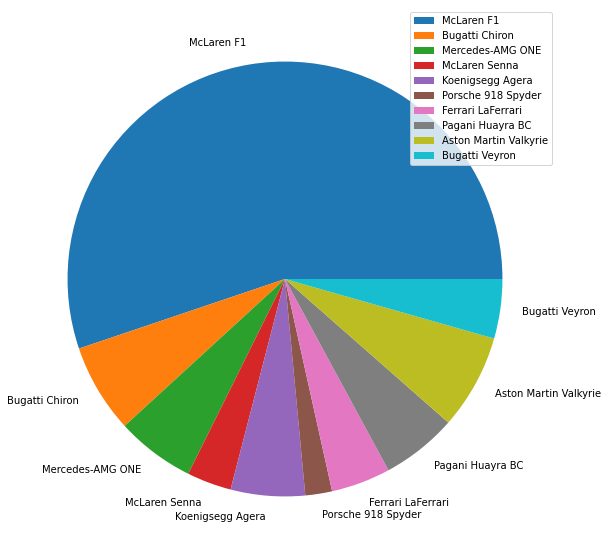

In [26]:
##Compare the prices of all the cars within the dataset

#Values/Labels for pie
costlabel =  ['McLaren F1','Bugatti Chiron','Mercedes-AMG ONE','McLaren Senna',
'Koenigsegg Agera','Porsche 918 Spyder','Ferrari LaFerrari','Pagani Huayra BC',
'Aston Martin Valkyrie','Bugatti Veyron']
costvalues = ['25000000','3000000','2653000','1500000','2500000',
              '900000','2000000','2550000','3200000','2000000']
mpy.figure(figsize = (15,10))

#Plot Pie
Costpie = mpy.pie(costvalues, labels = costlabel)

#Present
mpy.legend()
mpy.show(Costpie)

From this graph we can see that the McLaren F1 is dominating in temrs of cost. 
The reason for the extremely high pricetag is due to a few factors; 

- Very limited stock, with only 106 made, with ~64 left for road use. 
- All versions of the McLaren F1 are able to reach face-melting speeds - performance that competes with modern hypercars, and the sound that the V12 produces is nothing short of music to the ears.
- The F1 has cemented its name as an 'All-time classic' and one of the 'Greatest supercar of all-time', these labels evoke a   sense of prestige within collectors, when they are finally able to buy a McLaren F1


- These are the few reasons for why the McLaren F1 is now values around - $25,000,000. 

- The original price in 1992 was; $815,000





The Porsche 918 Sypder, like the McLaren is an outlier, being the cheapest car from the selection ($900,000.00). Relative to the other hypercars within this list, it's not the top performer, resulting in it's lower price. 
Though the performance the 918 Sypder delivers is nothing short of outstanding, the other hypercars seem to offer a little bit more. 

In [27]:
##Calculate Avgerage Cost
avgcost = [25000000,3000000,2653000,1500000,2500000,
              900000,2000000,2550000,3200000,2000000]
sum(avgcost) / len(avgcost)

4530300.0

##### Find Outliers within the dataset

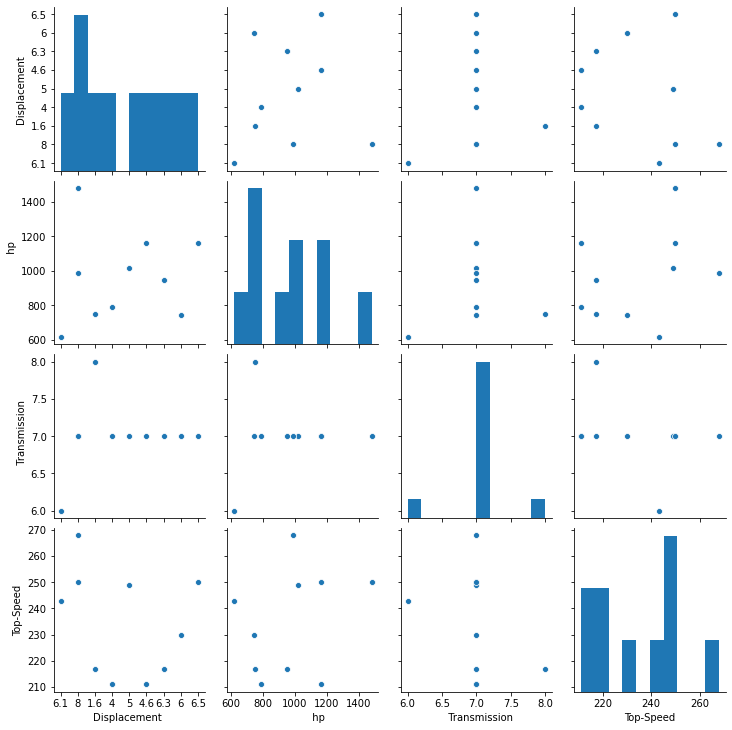

In [28]:
##
sns.pairplot(hyperdb)

The pairplot above represents a few important factors, such as;

- More gears =/ higher top speed.
- Higher HP =/ higher top speed. The Bugatti Veyron produces 987hp, and a top-speed of 267mph (Highest of cars present in this dataset). Though there are alot of factors regarding performance within a car (weight, downforce, tyres etc.), I'm currently focusing on one factor - HP.
